In [1]:
# imports
import pandas as pd
import numpy as np

In [124]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv', index_col='Loan_ID')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
train.shape

(614, 12)

In [126]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv', index_col='Loan_ID')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [127]:
test.shape

(367, 11)

In [128]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [129]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [130]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [131]:
train[train['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y


In [132]:
# fill Credit_History na's with most common value
train['Credit_History'] = train['Credit_History'].fillna(1.0)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
# check
train['Credit_History'].isnull().sum()

0

In [134]:
# convert Credit_History to str type
train['Credit_History'] = train['Credit_History'].astype(int).astype(str)
train['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [135]:
train.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,614,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,525,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,NaN,NaN,NaN


In [136]:
train['Loan_Amount_Term'].value_counts().sort_values()

12.0       1
36.0       2
60.0       2
120.0      3
84.0       4
240.0      4
300.0     13
480.0     15
180.0     44
360.0    512
Name: Loan_Amount_Term, dtype: int64

In [137]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(0).astype(int).astype(str)

In [138]:
train['ApplicantIncome'] = train['ApplicantIncome'].astype(float)

In [139]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [140]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
train[['Gender', 'Married', 'Dependents', 'Self_Employed']] = train[['Gender', 'Married', 'Dependents', 'Self_Employed']].fillna('DNA')

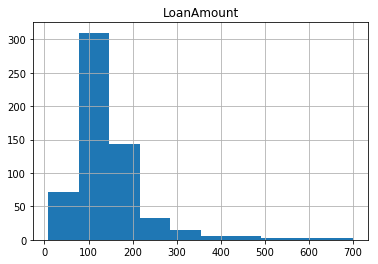

In [142]:
train.hist(column='LoanAmount');

In [143]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [144]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [145]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [146]:
train = pd.get_dummies(train)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_DNA,Gender_Female,Gender_Male,Married_DNA,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849.0,0.0,128.0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
LP001003,4583.0,1508.0,128.0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
LP001005,3000.0,0.0,66.0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
LP001006,2583.0,2358.0,120.0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
LP001008,6000.0,0.0,141.0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


In [147]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_DNA,Gender_Female,Gender_Male,Married_DNA,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,0.021173,0.182410,0.796417,0.004886,0.346906,0.648208,0.561889,...,0.024430,0.003257,0.006515,0.144951,0.855049,0.291531,0.379479,0.328990,0.312704,0.687296
std,6109.041673,2926.248369,84.107233,0.144077,0.386497,0.402991,0.069786,0.476373,0.477919,0.496559,...,0.154506,0.057026,0.080516,0.352339,0.352339,0.454838,0.485653,0.470229,0.463973,0.463973
min,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_DNA',
       'Gender_Female', 'Gender_Male', 'Married_DNA', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_DNA', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_DNA', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_0', 'Loan_Amount_Term_12',
       'Loan_Amount_Term_120', 'Loan_Amount_Term_180', 'Loan_Amount_Term_240',
       'Loan_Amount_Term_300', 'Loan_Amount_Term_36', 'Loan_Amount_Term_360',
       'Loan_Amount_Term_480', 'Loan_Amount_Term_60', 'Loan_Amount_Term_84',
       'Credit_History_0', 'Credit_History_1', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [149]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male', 
            'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 
            'Education_Graduate', 'Self_Employed_Yes', 'Loan_Amount_Term_12', 
            'Loan_Amount_Term_120', 'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 
            'Loan_Amount_Term_300', 'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_0', 
            'Loan_Amount_Term_480', 'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_1', 
            'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

In [150]:
train[features].dtypes

ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Self_Employed_Yes            uint8
Loan_Amount_Term_12          uint8
Loan_Amount_Term_120         uint8
Loan_Amount_Term_180         uint8
Loan_Amount_Term_240         uint8
Loan_Amount_Term_300         uint8
Loan_Amount_Term_36          uint8
Loan_Amount_Term_360         uint8
Loan_Amount_Term_0           uint8
Loan_Amount_Term_480         uint8
Loan_Amount_Term_60          uint8
Loan_Amount_Term_84          uint8
Credit_History_1             uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [151]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [152]:
# set number of clusters
kclusters = 5

loan_clustering = train[features]

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, n_init=12).fit(loan_clustering)

# check cluster labels generated for each row in the dataframe
train['clusters'] = kmeans.labels_

In [153]:
# add clustering labels
features.append('clusters')
features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Gender_Male',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Self_Employed_Yes',
 'Loan_Amount_Term_12',
 'Loan_Amount_Term_120',
 'Loan_Amount_Term_180',
 'Loan_Amount_Term_240',
 'Loan_Amount_Term_300',
 'Loan_Amount_Term_36',
 'Loan_Amount_Term_360',
 'Loan_Amount_Term_0',
 'Loan_Amount_Term_480',
 'Loan_Amount_Term_60',
 'Loan_Amount_Term_84',
 'Credit_History_1',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'clusters']

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
# set X and y
X = train[features]
y = train['Loan_Status_Y']

In [156]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [157]:
train['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size= 0.25, stratify=y, random_state=42)

In [160]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

0.7826680332290431

In [162]:
lr_preds = lr.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score

In [164]:
print('Train score:', accuracy_score(y_train, lr.predict(X_train)))
print('Test score:', accuracy_score(y_test, lr_preds))

Train score: 0.8065217391304348
Test score: 0.8636363636363636


In [165]:
from sklearn.metrics import confusion_matrix, classification_report

In [166]:
confusion_matrix(y_test, lr_preds)

array([[ 29,  19],
       [  2, 104]], dtype=int64)

In [167]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73        48
           1       0.85      0.98      0.91       106

   micro avg       0.86      0.86      0.86       154
   macro avg       0.89      0.79      0.82       154
weighted avg       0.87      0.86      0.85       154



In [168]:
import matplotlib.pyplot as plt

In [169]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, lr_preds, labels=[0,1]))

[[ 29  19]
 [  2 104]]


Confusion matrix, without normalization
[[ 29  19]
 [  2 104]]


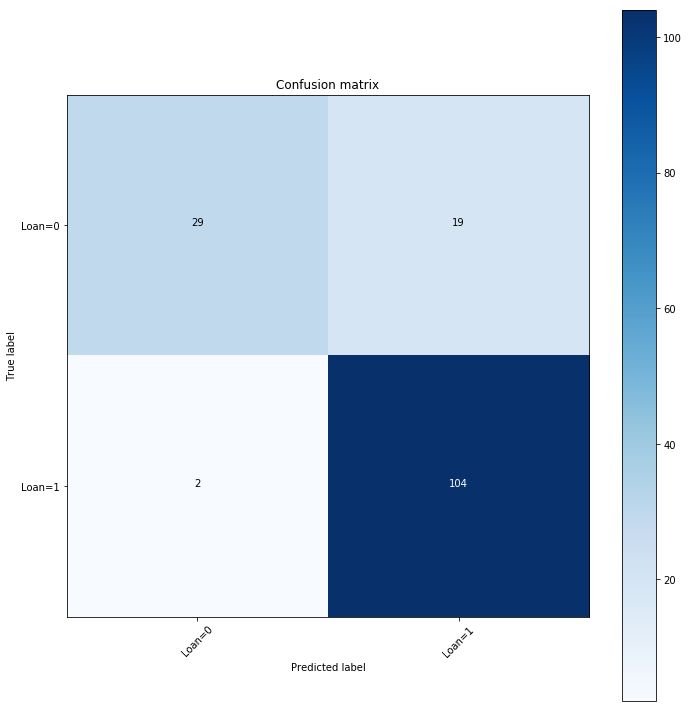

In [170]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_preds, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['Loan=0', 'Loan=1'], normalize= False, title='Confusion matrix')

In [ ]:
test.isnull().sum()

In [ ]:
test[test['Loan_Amount_Term'].isnull()]